# 2019 Ford Go-Bike  Exploration
## by Ima Jackson

## Introduction



The data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area for Febrary, 2019.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Loading the data into dataframe

In [2]:
# Load the dataset into dataframe

bike_df = pd.read_csv('fordgobike-tripdata.csv')

In [3]:
# Print statistics

print(bike_df.shape)
print(bike_df.dtypes)
bike_df.describe()

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.000000             37.770407   
50%                -122.398285      100.000000             37.781010   
75%                -122.286533      235.000000             37.797320   
max                -121.874119      398.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year  
count          183412.000000  183412.000000      175147.000000  
mean             -122.352250    4472.906375        1984.806437  
std                 0.116673    1664.383394          10.116689  
min              -122.453704      11.000000        1878.000000  
25%              -122.411726    3777.000000        1980.000000  
50%              -122.398279    4958.000000        1987.000000  
75%              -122.288045    5502.000000        1992.000000  
max              -121.874119    6645.000000        2001.000000

In [4]:
# View top 5 rows

bike_df.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

In [5]:
# Checking info of the dataset

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


The dataset contains missing values.

The date columns are in the wrong format.

In [6]:
# Checking for missing values

bike_df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

There are missing values in the station id columns, station names, birth year and gender columns.

I will be dropping the rows that contain null values from station id and station name columns.

Trip duration is in seconds, i will be converting to minutes so it can be easier to work with.

Lastly, i will extract the Age of users using the birth year colmnn.

In [7]:
# Dropping null values from station id and station name columns

bike_df = bike_df[bike_df.start_station_id.notnull()]
bike_df = bike_df[bike_df.end_station_id.notnull()]
bike_df = bike_df[bike_df.start_station_name.notnull()]
bike_df = bike_df[bike_df.end_station_id.notnull()]

In [8]:
# Check if rows with null values have been dropped from station id and station name columns

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183215 non-null int64
start_time                 183215 non-null object
end_time                   183215 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183215 non-null float64
start_station_longitude    183215 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183215 non-null float64
end_station_longitude      183215 non-null float64
bike_id                    183215 non-null int64
user_type                  183215 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    183215 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 23.8+ MB


Null values have been dropped from station id and station name columns.

In [9]:
# Check statistics 

bike_df.duration_min = bike_df.duration_sec/60
bike_df.duration_min.describe()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


count    183215.000000
mean         12.098367
std          29.917978
min           1.016667
25%           5.416667
50%           8.566667
75%          13.266667
max        1424.066667
Name: duration_sec, dtype: float64

Duration_min column has been extracted, the shortest trip time is 1 minute, the longest trip time is 1,424 minutes, while the average trip time is 12 minutes.

In [10]:
bike_df['duration_min'] = bike_df['duration_sec'].apply(lambda x: 2019 - x)

In [11]:
# Create age column to convert member birth year to age

bike_df['Age'] = bike_df['member_birth_year'].apply(lambda x: 2019 - x)

In [12]:
# Check statistics on age column

bike_df['Age'].describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: Age, dtype: float64

The youngest rider is 18 years, and the oldest is 141 years.

In [13]:
# Check value count for age column

bike_df['Age'].value_counts().head(10)

31.0    10214
26.0     9323
30.0     8967
29.0     8640
28.0     8484
27.0     8245
32.0     8010
33.0     7953
25.0     7654
24.0     7420
Name: Age, dtype: int64

There are more of younger riders than older ones in the dataset. This could be as a result of the younger people being more active than the older ones.

In [14]:
# Replace null values with zero in Age column

bike_df['Age'] = bike_df['Age'].replace(np.NaN, 0)
bike_df.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  duration_min   Age  
0          Male                      No        -50166  35.0  
1           NaN                      No        -40502   0.0  
2          Male                      No        -59835  47.0  
3         Other                      No        -34471  30.0  
4          Male                     Yes           434  45.0

In [15]:
# Convert age to integer

bike_df['Age'] = bike_df['Age'].astype('int64')

### What is the structure of your dataset?

There are 183,412 bike trips in this dataset with 16 features. Each row contains information on individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

### What is/are the main feature(s) of interest in your dataset?

* I am interested in the most popular start and end stations to know the busiest areas in San Francisco.

* What stations do riders spend more trip time, and which hour of the day and day of week has the highest trips?.

* Lastly, i am interested in knowing certain characteristics such as the age, user_types and gender of riders.   

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

* The start_station_name and end_station_name features in this dataset will help show the busiest parts of San Francisco.

* I will extract the trip time from the duration_sec column, and the time riders prefer to go on trips most using the start_time and end_time columns.

* I will use the member_birth_year, member_gender, and  user_type features to extract the age, sex  and user type of riders.

## Univariate Exploration




I will start with changing the start time column to datetime, since i am interested in getting the days and hours trips are taken most.


In [16]:
# Convert start time to datetime

bike_df['start_time'] = pd.to_datetime(bike_df['start_time'])

In [17]:
# Extract weekday and hour from start time

bike_df['day_of_week'] = bike_df['start_time'].dt.weekday_name
bike_df['hour'] = bike_df['start_time'].dt.hour

In [18]:
# Create dictionary to set weekday name

ordinal_var_dict = {'day_of_week': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    bike_df[var] = bike_df[var].astype(ordered_var)

In [19]:
print(bike_df['day_of_week'].value_counts())

Thursday     35176
Tuesday      31781
Wednesday    29609
Friday       28962
Monday       26807
Sunday       15503
Saturday     15377
Name: day_of_week, dtype: int64


Bike trips are taken most on Thursdays.

In [20]:
# Print hour count 

print(bike_df['hour'].value_counts())

17    21847
8     21041
18    16812
9     15886
16    14150
7     10610
19     9873
15     9163
12     8707
13     8531
10     8354
14     8135
11     7872
20     6472
21     4560
6      3484
22     2915
23     1645
0       925
5       896
1       548
2       380
4       235
3       174
Name: hour, dtype: int64


The hour that had the highest number of rides is 17:00.

In [21]:
# Check gender count

bike_df['member_gender'].value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

There are more male riders in the dataset.

In [22]:
# Count user types

bike_df['user_type'].value_counts()

Subscriber    163414
Customer       19801
Name: user_type, dtype: int64

There are more subscriber users compared to customers.

### 1. What day of the week has the highest number of trips?

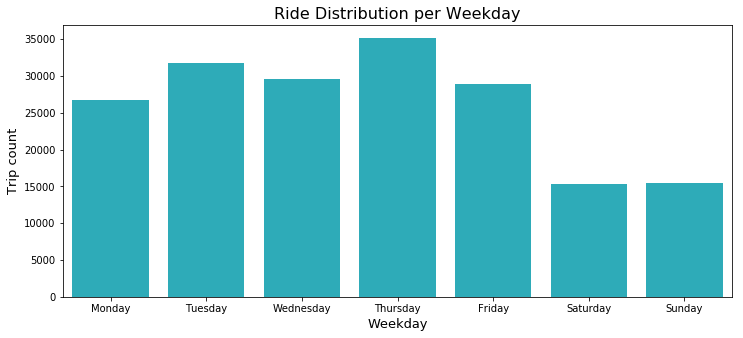

In [23]:
# Plot trips by weekday

plt.figure(figsize=(12,5))
base_color = sb.color_palette()[9]
sb.countplot(data=bike_df, x='day_of_week', color=base_color)
plt.xlabel('Weekday', fontsize=13)
plt.ylabel('Trip count', fontsize=13)
plt.title('Ride Distribution per Weekday', fontsize=16);

The barplot above reveals the distribution of rides per weekday. There is a reduction of bars towards weekend, with a gradual increase by the beginning of the week, and it experienced its peak on Thursday. Users ride most during the week than weekends, this could be as a result of high level of activities during the week as compared to the weekends.

### 2. What hour of the day has the highest number of trips?

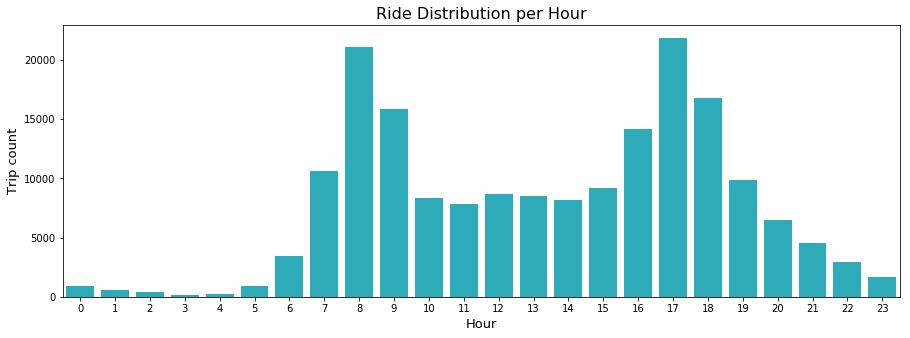

In [24]:
# Plot trips by hour

plt.figure(figsize=(15,5))
base_color = sb.color_palette()[9]
sb.countplot(data=bike_df, x='hour', color=base_color)
plt.xlabel('Hour', fontsize=13)
plt.ylabel('Trip count', fontsize=13)
plt.title('Ride Distribution per Hour', fontsize=16);

The bars are noticeably low from 12am - 5am, it will be unusual for people to ride by that time. There seems to be an increase in bar size between 7am-9am, with the first peak around 8am, and also between 4pm - 6pm, with the highest peak around 5pm, and a steady decline for the rest of the day, while the afternoon hours seem to maintain an average steady rate.

### 3. Which start stations are most popular?

In [25]:
# Top 10 most popular start stations

start_station_df = bike_df['start_station_name'].value_counts().head(10)
start_station_df

Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
San Francisco Ferry Building (Harry Bridges Plaza)           2710
San Francisco Caltrain (Townsend St at 4th St)               2703
Powell St BART Station (Market St at 5th St)                 2327
Howard St at Beale St                                        2293
Steuart St at Market St                                      2283
Name: start_station_name, dtype: int64

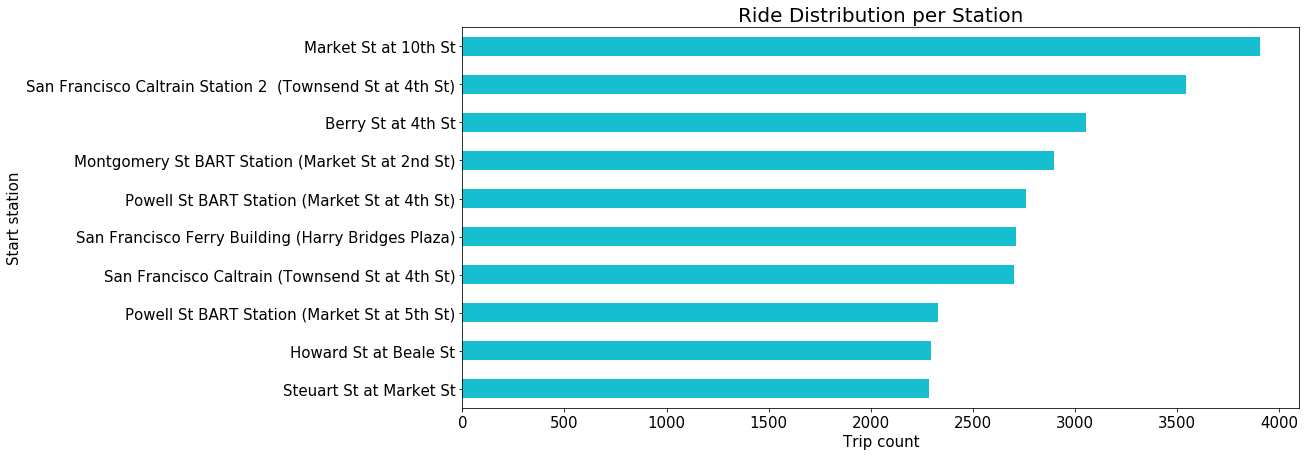

In [26]:
# Plot top 10 start stations

plt.figure(figsize=(15,7))
base_color = sb.color_palette()[9]
bike_df['start_station_name'].value_counts().sort_values(ascending=True).tail(10).plot(kind='barh', color=base_color, fontsize=15)
plt.xlabel('Trip count', fontsize=15)
plt.ylabel('Start station', fontsize=15)
plt.title('Ride Distribution per Station', fontsize=20);

The chart above displays the top 10 start stations with highest trips in San Francisco Bay area. It experiences its peak at Market St at 10th St, and there seems to be a noticeable gap in the first three stations.

### 4. What end stations are most popular?

In [27]:
# Top 10 moat popular end stations

end_station_df = bike_df['end_station_name'].value_counts().head(10)
end_station_df

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4857
Market St at 10th St                                         3973
Montgomery St BART Station (Market St at 2nd St)             3647
San Francisco Ferry Building (Harry Bridges Plaza)           3368
Powell St BART Station (Market St at 4th St)                 2997
San Francisco Caltrain (Townsend St at 4th St)               2947
Berry St at 4th St                                           2872
The Embarcadero at Sansome St                                2512
Powell St BART Station (Market St at 5th St)                 2353
Steuart St at Market St                                      2338
Name: end_station_name, dtype: int64

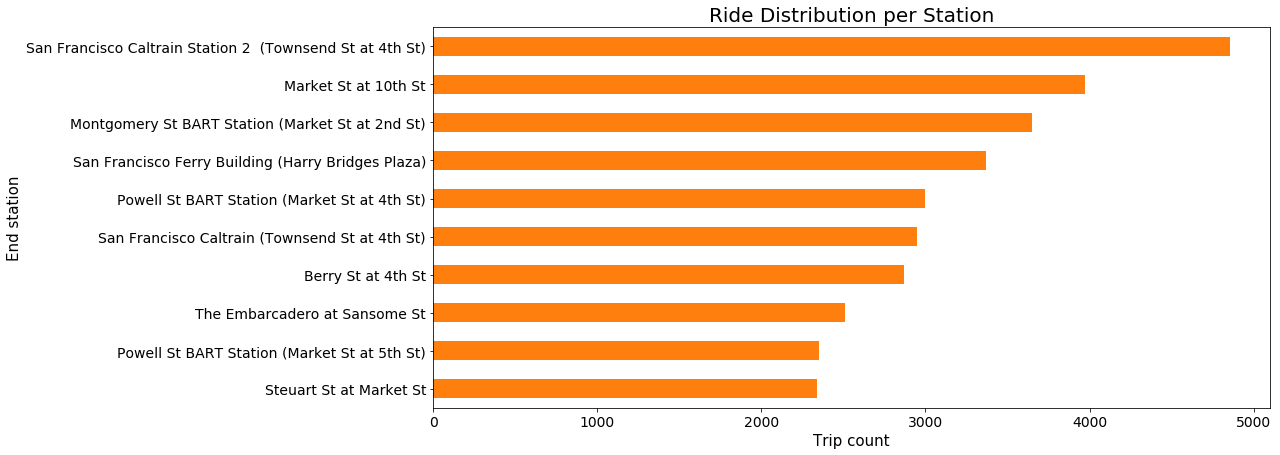

In [28]:
# Plot top 10 end stations

plt.figure(figsize=(15,7))
base_color = sb.color_palette()[1]
bike_df['end_station_name'].value_counts().sort_values(ascending=True).tail(10).plot(kind='barh', color=base_color, fontsize=14)
plt.xlabel('Trip count', fontsize=15)
plt.ylabel('End station', fontsize=15)
plt.title('Trip Distribution per Station', fontsize=20);

The barplot above shows the top 10 end stations in San Francisco Bay area, with its peak in San Francisco Caltrain Station 2  (Townsend St at 4th St). There is a great diference in size between the first two bars.

### 5. What is the frequency of trips by users?

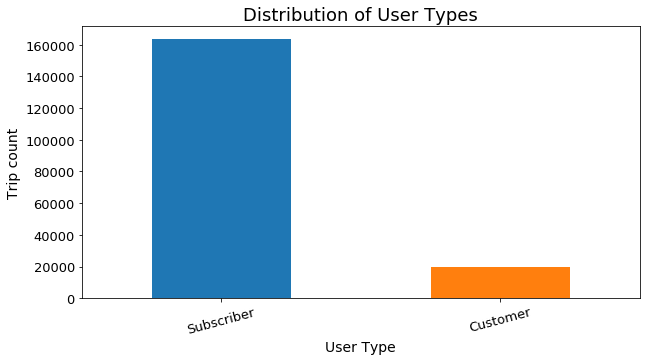

In [29]:
# Plot graph to show user types

plt.figure(figsize=(10,5))
base_color = sb.color_palette()[1]
bike_df['user_type'].value_counts().plot(kind='bar', fontsize=13)
plt.xlabel('User Type', fontsize=14)
plt.ylabel('Trip count', fontsize=14)
plt.title('Distribution of User Types', fontsize=18)
plt.xticks(rotation=15);

Majority of the users in San Francisco Bay area are subscribers.

### 6. What gender has the highest trips?

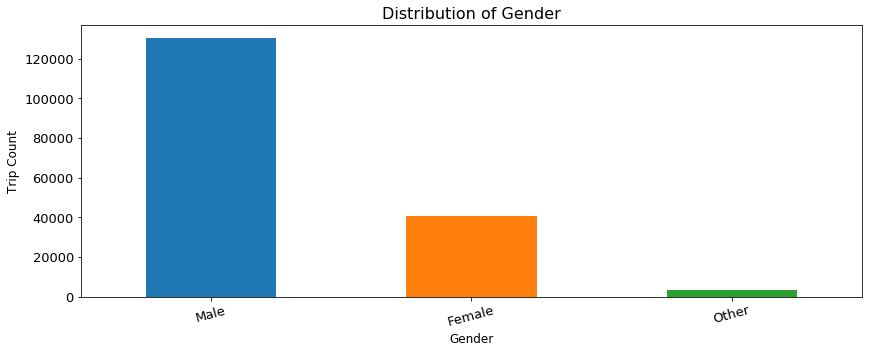

In [30]:
# Plot graph to show gender count of riders

gender_df = bike_df['member_gender'].value_counts()

gender_df.plot(kind='bar', figsize=(14,5), fontsize=13)
plt.title('Distribution of Gender',fontsize=16)
plt.xlabel('Gender',fontsize=12)
plt.ylabel('Trip Count',fontsize=12)
plt.xticks(rotation=15);

We can see the great difference in bar sizes in the gender count of trips. The male gender has the highest number of trips.

### 7. What is the age category of the most riders?

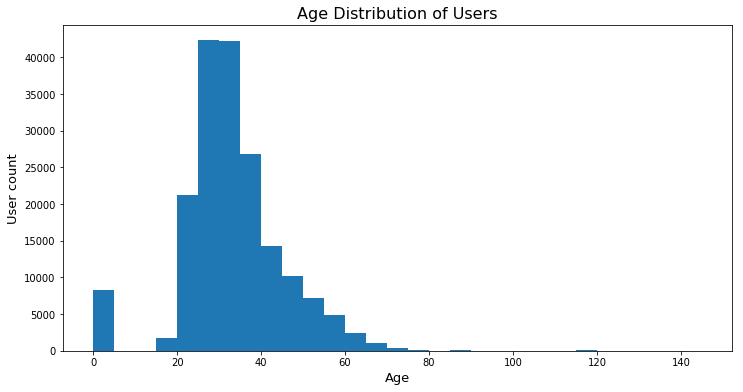

In [31]:
# Plot histogram to check age distribution of users

def histogram_set():
    
    plt.figure(figsize=(12 ,6))
    binsize =2
    bins = np.arange(0, bike_df['Age'].max()+5, 5)
    np.arange(10, bike_df['Age'].max()+binsize, binsize)
    plt.hist(data = bike_df, x = 'Age', bins = bins)
    plt.title('Age Distribution of Users', fontsize=16)
    plt.xlabel('Age', fontsize=13)
    plt.ylabel('User count', fontsize=13)

histogram_set()

In [32]:
# Print outliers

outliers = ((bike_df['Age'] > 100))
print(outliers.sum())

72


There is a distribution of data points with more users between 20 - 45 years of age, and there is a decline in users above 40 years. We can also see that ages between 25 to about 35 seem to have the highest number of users. There are 72 outliers in the data, with people above 100 years, which seems rather unusual. The 0 values is as a result of null values replaced by 0.

In [33]:
# Drop outliers

bike_df = bike_df[bike_df['Age'] < 100]
bike_df = bike_df[bike_df['Age'] != 0]

In [34]:
# Check if outliers have heen dropped

bike_df.Age.describe()

count    174880.000000
mean         34.162043
std           9.974001
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          99.000000
Name: Age, dtype: float64

Rows with zero values and above 100 years have been dropped.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

From the univariate exploration above, I was able to use visuals to see that people prefer going on bike trips mostly during the week probably due to work and business activities, and the highest trips was experienced on Thursday. People do not really go on bike trips by weekends. The visuals also shows the peak period of trips, which is between 7am - 9am in the mornings and 4pm - 6pm in the evenings, with a reduction of trips frm 7pm - 6am. It also shows the start station with highest trips, which is Market St at 10th St, and the end station with highest trips, which is San Francisco Caltrain Station 2  (Townsend St at 4th St). Majority of the users are subscribers and we have more males as well. Most of the riders are between 20-35 years.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The member birth year column contained ages above 100 years, which seems to be unusual. So i had to drop rows above 100 years. The duration column also has values out of range, had to drop outliers.

## Bivariate Exploration

.

### 1. What is the distribution of users by Weekday?

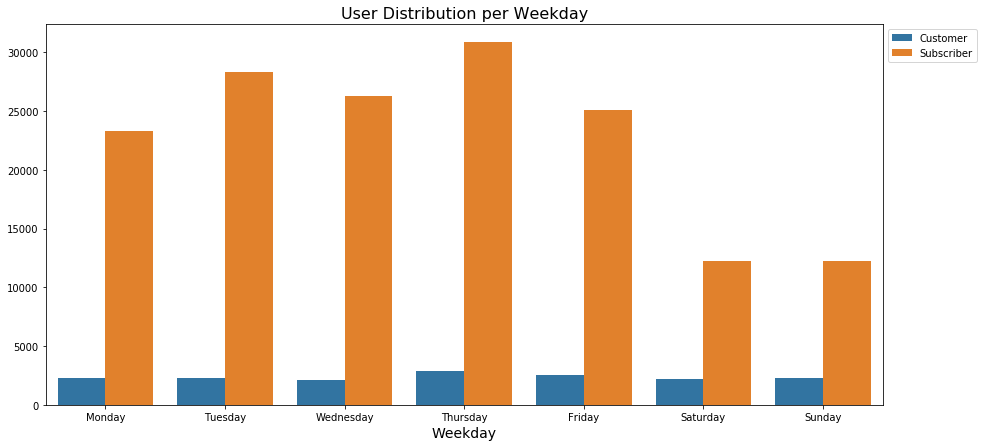

In [35]:
# Plot chart to show usage by weekday

plt.figure(figsize=(15,7))

bike_data = sb.countplot(data=bike_df, x='day_of_week',  hue='user_type')
plt.xlabel('Weekday', fontsize=14)
plt.title('User Distribution per Weekday', fontsize=16)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
bike_data.set(ylabel='');

We can see the huge difference in bar sizes for both users. The chart above shows that both users had the highest trips on Thursday, and subscribers had more trips compared to customers.

### 2. What is the time spent on trips by users?

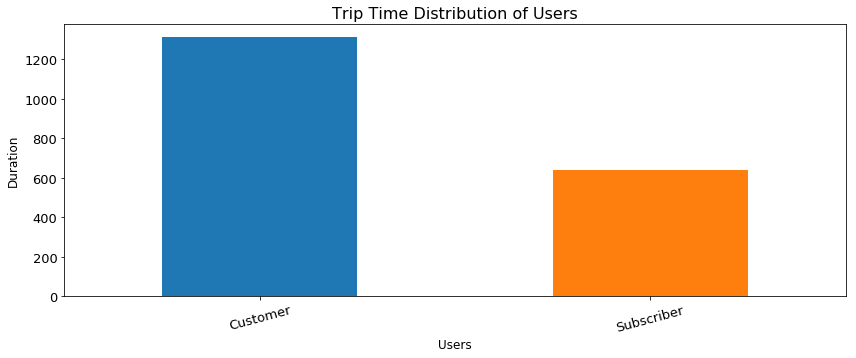

In [36]:
# Pkot trip duration distribution of users

plt.figure(figsize=(12,6))

base_color = sb.color_palette()[1]
gender_trips = bike_df.groupby(['user_type']).mean()['duration_sec']
gender_trips.plot(kind='bar', figsize=(14,5), fontsize=13)
plt.title('Trip Time Distribution of Users',fontsize=16)
plt.xlabel('Users',fontsize=12)
plt.ylabel('Duration',fontsize=12)
plt.xticks(rotation=15);

From the chart above, we can see that customers spend the most time on bike trips, even though the subscribers had a much higher number of trips.

### 3. What is the relationship between trip duration and age?

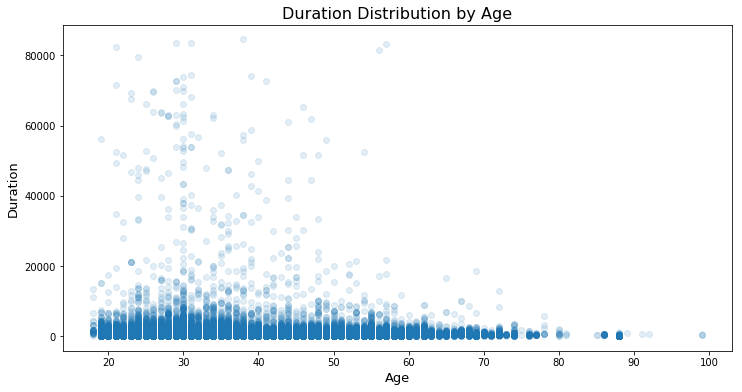

In [37]:
# Scatterplot graph to show relationship between duration and age

def scatterplot_set():
    
    plt.figure(figsize=(12 ,6))
    plt.scatter(data = bike_df, x = 'Age', y = 'duration_sec', alpha = 1/8)
    plt.xlabel('Age', fontsize=13)
    plt.ylabel('Duration', fontsize=13)
    plt.title('Duration Distribution by Age', fontsize=16)

scatterplot_set()

We can see the relationship is stronger between 25-45 years, and it gets weaker as the age increases.

### 4. How is gender population distributed in top start stations?

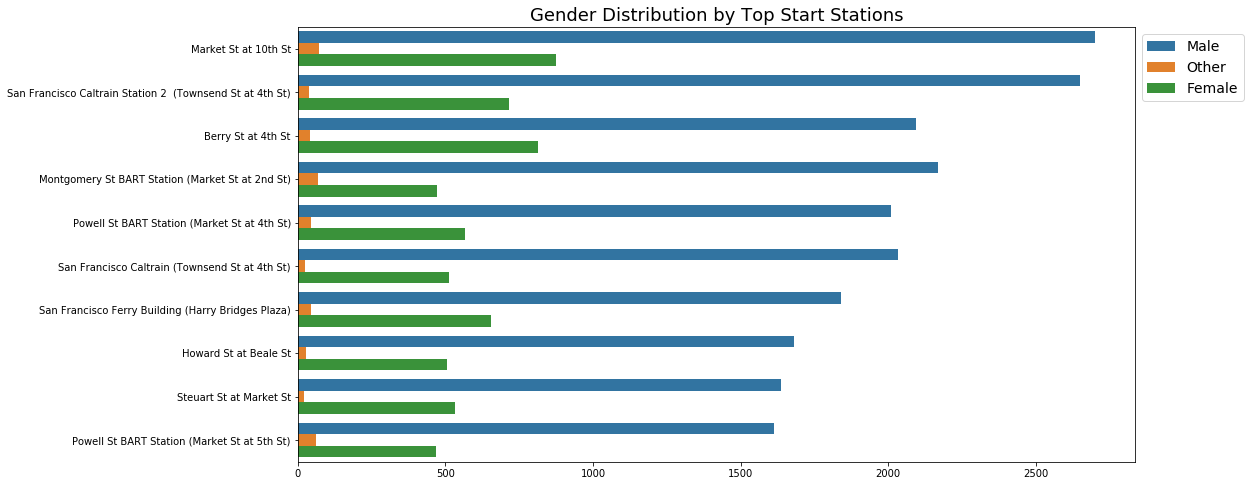

In [52]:
# Gender count for top start stations

bike_gen = bike_df.copy()
bike_data = bike_gen['start_station_name'].value_counts().head(10)
st_stat_order = bike_data.index
plt.figure(figsize=(15,8))

bike_df = sb.countplot(data=bike_df, y='start_station_name', order=st_stat_order, hue='member_gender')
plt.title('Gender Distribution by Top Start Stations', fontsize=18)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=14)
bike_df.set(ylabel='',xlabel='');

The visual above displays gender count for top 10 start stations. The longer bars represents the male gender. It is also observed here that Market St at 10th St had the highest count for all genders.

### 5. What top start stations have the highest trip duration?

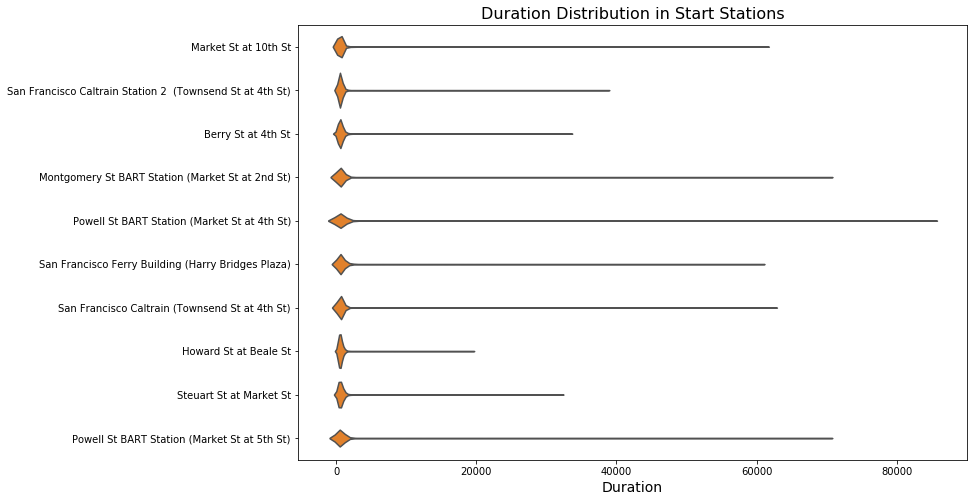

In [38]:
# Use violinplot to show trip duration distribution in start stations

start_station = ['Market St at 10th St', 'San Francisco Caltrain Station 2  (Townsend St at 4th St)', 'Berry St at 4th St', 'Montgomery St BART Station (Market St at 2nd St)', 'Powell St BART Station (Market St at 4th St)', 'San Francisco Ferry Building (Harry Bridges Plaza)', 'San Francisco Caltrain (Townsend St at 4th St)', 'Howard St at Beale St', 'Steuart St at Market St', 'Powell St BART Station (Market St at 5th St)']

vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=start_station)

plt.figure(figsize=(12,8))
bike_df['start_station_name'] = bike_df['start_station_name'].astype(vclasses)
bike_data = sb.violinplot(data=bike_df, x='duration_sec', y='start_station_name', color=base_color, inner=None)
plt.xlabel('Duration', fontsize=14)
plt.ylabel('Start Station', fontsize=14)
plt.title('Duration Distribution in Start Stations', fontsize=16)
bike_data.set(ylabel='')
base_color = sb.color_palette()[1];




We can see from the visual above that the violin is sharper at Powell St BART Station (Market St at 4th St), which makes it the start station with the highest trip time.

### 6. What top end stations have the highest trip duration?

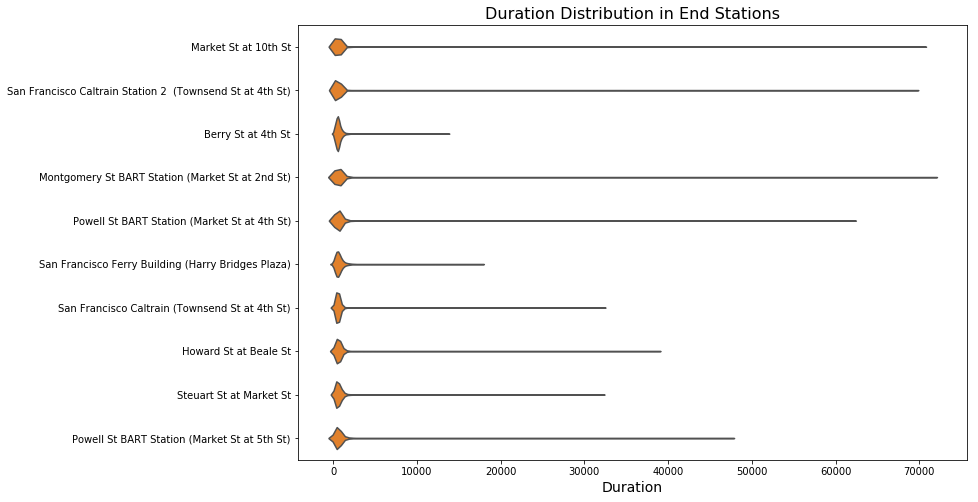

In [41]:
end_station = ['San Francisco Caltrain Station 2  (Townsend St at 4th St)', 'Market St at 10th St', 'Montgomery St BART Station (Market St at 2nd St)', 'San Francisco Caltrain (Townsend St at 4th St)', 'Powell St BART Station (Market St at 4th St)', 'San Francisco Caltrain (Townsend St at 4th St)', 'Berry St at 4th St', 'The Embarcadero at Sansome St', 'Steuart St at Market St', 'Powell St BART Station (Market St at 5th St)']

vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=start_station)

plt.figure(figsize=(12,8))
bike_df['end_station_name'] = bike_df['end_station_name'].astype(vclasses)
bike_data = sb.violinplot(data=bike_df, x='duration_sec', y='end_station_name', color=base_color, inner=None)
plt.xlabel('Duration', fontsize=14)
plt.ylabel('End Station', fontsize=14)
plt.title('Duration Distribution in End Stations', fontsize=16)
bike_data.set(ylabel='')
base_color = sb.color_palette()[1];

From the visual above, the violin plot has a smoother end at Montgomery St BART Station (Market St at 2nd St), making it the end station with the highest trip time.

### 7. Which user had the most trip time?

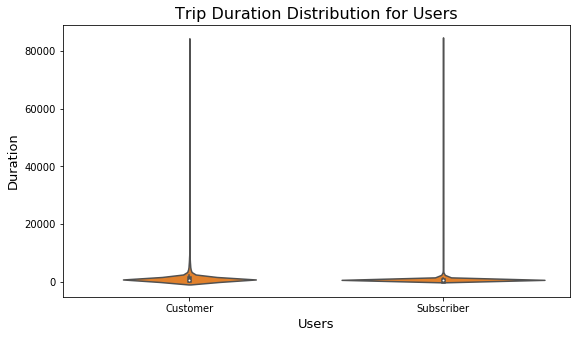

In [40]:
# Violin plot to show trip duration for users

plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = bike_df, x = 'user_type', y = 'duration_sec', color = base_color)
plt.xlabel('Users', fontsize=13)
plt.ylabel('Duration', fontsize=13)
plt.title('Trip Duration Distribution for Users', fontsize=16)
bike_data.set(ylabel='')
base_color = sb.color_palette()[1];

We can notice the less flatter violin plot for customer users compared to the flatter plot for subscribers. The customers had a higher trip duration time.

In [42]:
# Select each user from user_type and store 

user_customer = bike_df['user_type'] =='Customer'
user_subscriber = bike_df['user_type'] =='Subscriber'

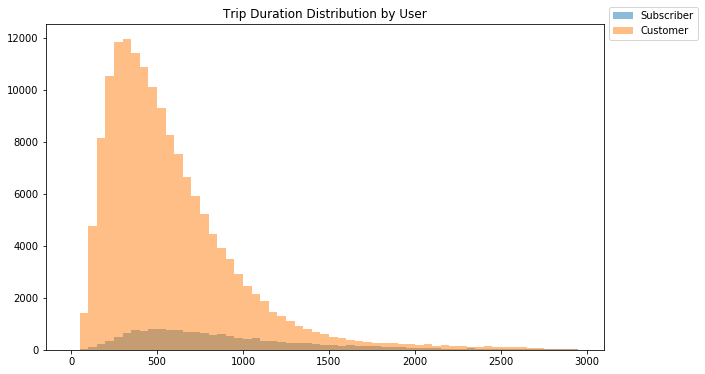

In [43]:
# Plot histogram to show trip duration by user type

plt.figure(figsize=(10,6))
bins = np.arange(0, 3000, 50)

plt.hist(bike_df[user_customer].duration_sec, bins, alpha=0.5, label='Subscriber')
plt.hist(bike_df[user_subscriber].duration_sec, bins, alpha=0.5, label='Customer')
plt.title('Trip Duration Distribution by User')
plt.legend(loc='center left', bbox_to_anchor=(1, 1))
plt.show()

The plot above shows the histogram distribution is skewed to the right. Customers had the highest trip time, even though subscribers had more trips than customers. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The bivariate exploration above displays relationships between variables From the exploration, Thursdays seem to be the weekday both users prefer to go for rides, though there are more subscribers than customers. It is also observed that customers spend more time on trips than subscribers. People that spend more time on trips are between 25-35 years. More male riders are found in the start stations. Start and end stations with the highest trips do not have the highest trip duration. The histogram plot is skewed to the right, and we can see the high trip duration for the customers.
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I found the relationship between users and trip duration quite interesting. When the trip count was compared in the univariate exploration, it was observed that there were more subscribers than users, however the customers spend more time on trips. The subscribers go on shorter trips.

## Multivariate Exploration



### 1. Is trip time dependent on gender and age?

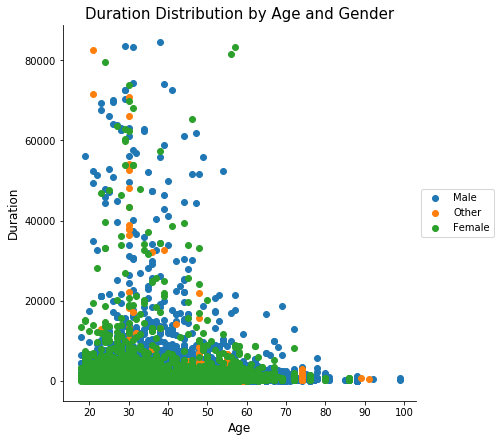

In [51]:
# Visual display of trip duration by age and gender

df = sb.FacetGrid(data = bike_df, hue = 'member_gender', size = 6)
df.map(plt.scatter, 'Age', 'duration_sec')
plt.title('Duration Distribution by Age and Gender', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Duration', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5));

It is observed from the plot above that the male gender is more concentrated below due to the fact that they have lesser trip time, and more of the population is between 25-45 years. The users that go on long trips are within this age range.

### 2. What relationship exists between trip duration, users and gender?

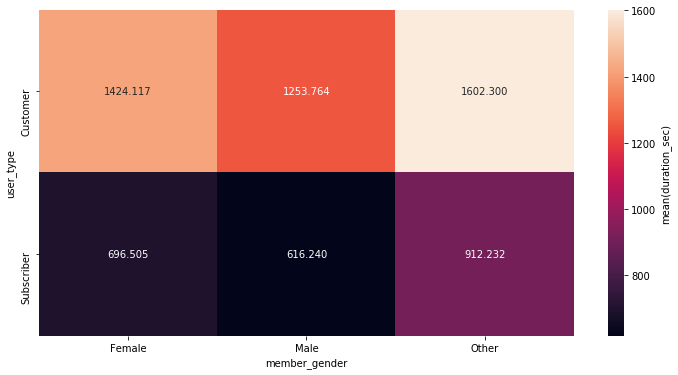

In [45]:
# Visual display of heatmap to show trip duration by users and gender

plt.figure(figsize=(12,6))

duration_means = bike_df.groupby(['member_gender', 'user_type']).mean()['duration_sec']
duration_means = duration_means.reset_index(name = 'duration_sec_avg')
duration_means = duration_means.pivot(index = 'user_type', columns = 'member_gender',
                            values = 'duration_sec_avg')
sb.heatmap(duration_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(duration_sec)'});

The heatmap shows the trip duration distribution of users by their gender. We can see the comparison between these variables. We can see clearly that the male customers and subscribers had the least trip duration, while the others gender category had the hoghest trip time.

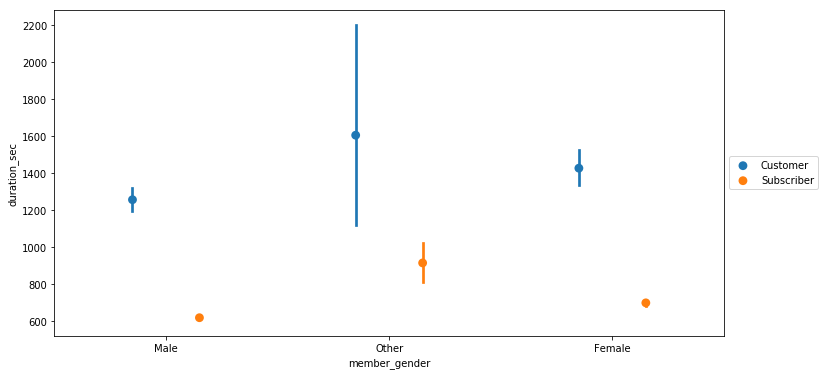

In [47]:
# Trip duration by users and gender

plt.figure(figsize=(12,6))

ax = sb.pointplot(data = bike_df, x = 'member_gender', y = 'duration_sec', hue = 'user_type',
dodge = 0.3, linestyles = "")
plt.legend(loc='center left', bbox_to_anchor=(1,0.5));

From the pointplot above, we can see the points for both users are lowered in the male gender, while both user points are higher in others gender category.

### 3. How is trip duration of users distributed weekly?

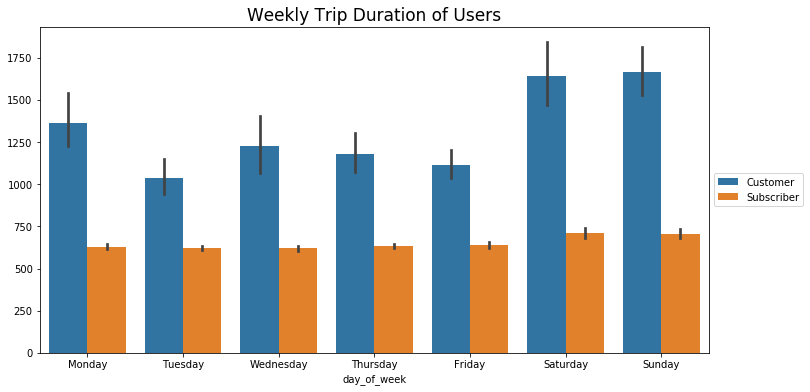

In [50]:
# Barplot to display weekly trip duration of users

plt.figure(figsize=(12,6))
plt.title('Weekly Trip Duration of Users', fontsize=17)
bikes = sb.barplot(data=bike_df, x='day_of_week', y='duration_sec', hue='user_type')

plt.legend(loc='center left', bbox_to_anchor=(1,0.5));
bikes.set(ylabel='');

The visual above represents the weekly duration of trips by users, and we can see here that even though weekends had the less trips compared to weekdays, it had the highest trip duration, and it was more of customers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The relationship between the trip duration, age and gender still emphasizes the fact that male gender had the least trip time for both users, while the others gender category had the highest trip time spend longer time on trips as compared to other age and gender categories. We also see from the heatmap displays a summary of gender trip duration by users. It shows that even though the male gender had more trips compared to other gender categories, they still had the least trip time.

### Were there any interesting or surprising interactions between features?
It was interesting to discover that males had less travel time compared to other gender category, because there was a huge gap in the number of trips embarked by males, compared to other gender categories. It is also observed that weekends had more trip time compared to weekdays, even though there was great difference in the number of trips by weekday.


## Conclusions 

* The highest number of trips were made on Thursday, and the most popular start hour is 5pm. People go on trips more during the week, with a lesser number of trips on weekends. With the help of seaborn and matplotlib libraries, i was able to use bar chart to display the visuals that answered the questions of interest.

* Market St at 10th St is the most popular start station while San Francisco Caltrain Station 2  (Townsend St at 4th St) is the most popular end station. The bar horizontal chart was used to display the visuals because it is long enough to show range of variables.

* More trips were taken by male subscriber users, while customers had the most trip duration. Bar plot was used to display this visual.

* There were more subscriber users than customers, though the subscribers had short trips which resulted in the lesser trip time compared to the customers. The bar plot was used in displaying the visuals.

* The trip duration is not dependent on the numner of trips. Powell St BART Station (Market St at 4th St) had the highest trip duration for top 10 start stations, while Montgomery St BART Station (Market St at 2nd St had the highest trip time for top 10 end stations. The violin plot was used to display the visuals fot this finding.

* Most of the riders were between 25-45 years. The histogram plot was used to display visuals.

* Male gender for both customers and subscribers had the least trip time, though they had more trips compared to other gender category. This shows that trip duration is not dependent on trip count. Scatter plot, heatmap and point plot were used to display the visuals for this finding.

* The weekly trip duration of users is like a reverse of the weekly trip count of users. Customers had higher trip duration with greater values over the weekend. This shows that most of the subscribers probably go on short trips during work hours, while customers go on trips more on weekends. Barplot was used to display the visual.
